In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
movies_metadata = pd.read_csv('movies_dataset/movies_metadata.csv')
ratings = pd.read_csv('movies_dataset/ratings.csv')
keywords = pd.read_csv('movies_dataset/keywords.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_19176\2030364089.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('movies_dataset/movies_metadata.csv')


# Pradine duomenu patikra. Ar yra missing values? Kaip atrodo bendrai?

In [4]:
# A look at the first few values
print(movies_metadata.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [5]:
print(ratings.head())
print(keywords.head())

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205
      id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...


In [6]:
# Checking for any missing values
print(movies_metadata.isnull().sum())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


## Nemažai missing verčių, bet atrodo, kad homepage, belongs_to_collection, tagline nėra labai svarbūs duomenys meaningful analizei tai galima daug verčių neturinčius columns tiesiog atmesti.

In [7]:
print(ratings.isnull().sum())
print(keywords.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
id          0
keywords    0
dtype: int64


## Kiti csv failai atrodo okay.

## Pasitikrinam duomenų bendrą statistiką:

In [8]:
print(movies_metadata.describe())
print(ratings.describe())
# print(keywords.describe()) # just the id, not useful for any statistical analysis

            revenue       runtime  vote_average    vote_count
count  4.546000e+04  45203.000000  45460.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207    109.897338
std    6.433225e+07     38.407810      1.924216    491.310374
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000
              userId        movieId         rating     timestamp
count  100004.000000  100004.000000  100004.000000  1.000040e+05
mean      347.011310   12548.664363       3.543608  1.129639e+09
std       195.163838   26369.198969       1.058064  1.916858e+08
min         1.000000       1.000000       0.500000  7.896520e+08
25%       182.000000    1028.000000       3.000000  9.658478e+08
50%       367.000000    2406.500000       4.000000  

### Saw a specific entry with an odd looking name, but turns out the initial look just did not render Chinese characters:

In [9]:
movies_metadata['id'] = movies_metadata['id'].astype(str)
movie_id = '37557'
movie_entry = movies_metadata[movies_metadata['id'] == movie_id]
movie_entry

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
29,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,37557,tt0115012,zh,摇啊摇，摇到外婆桥,A provincial boy related to a Shanghai crime f...,...,1995-04-30,0.0,108.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,In 1930's Shanghai violence was not the proble...,Shanghai Triad,False,6.5,17.0


# Data cleaning procesas

In [10]:
print(movies_metadata.isnull().sum())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


## patikrinam galimus dates neatitikimus, indikuoja, kad yra duomenų, kurie atitinka savo vietos

In [11]:
def check_date_columns(df, columns):
    for column in columns:
        invalid_entries = df[pd.to_datetime(df[column], errors='coerce').isnull() & df[column].notnull()] # rows where converstion to date impossible (NaN) but original was not NaN
        if not invalid_entries.empty:
            print(f"Blogos vertės šitame column '{column}':")
            print(invalid_entries)

check_date_columns(movies_metadata, ['release_date'])

Blogos vertės šitame column 'release_date':
                                                   adult  \
19730                                 - Written by Ørnås   
29503   Rune Balot goes to a casino connected to the ...   
35587   Avalanche Sharks tells the story of a bikini ...   

      belongs_to_collection                            budget  \
19730              0.065736  /ff9qCepilowshEtG2GYWwzt2bs4.jpg   
29503              1.931659  /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg   
35587              2.185485  /zaSf5OG7V8X8gqFvly88zDdRm46.jpg   

                                                  genres  \
19730  [{'name': 'Carousel Productions', 'id': 11176}...   
29503  [{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...   
35587  [{'name': 'Odyssey Media', 'id': 17161}, {'nam...   

                                                homepage          id imdb_id  \
19730  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...  1997-08-20       0   
29503  [{'iso_3166_1': 'US', 'name': 'United States o

In [12]:
def check_numerical_columns(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce') # errors='coerce' argument makes values that cannot be converted to numeric types to be set to NaN
        invalid_entries = df[df[column].isnull() & df[column].notnull()] # shows rows where the conversion to numeric was impossible (NaN) but the original value was not NaN

        if not invalid_entries.empty:
            print(f"Blogos vertės šitame column '{column}':")
            print(invalid_entries)
    return df

movies_metadata = check_numerical_columns(movies_metadata, ['budget', 'revenue', 'popularity'])

rows_to_remove = movies_metadata[movies_metadata[['budget', 'revenue', 'popularity']].isnull().any(axis=1)]
print("Rows that will be removed:")
print(rows_to_remove)

movies_metadata_clean = movies_metadata.dropna(subset=['budget', 'revenue', 'popularity'])

# movies_metadata_clean.to_csv('cleaned_movies_metadata_v1.csv', index=False) # save the file to check

# print(movies_metadata_clean.head())

Rows that will be removed:
                                                   adult  \
19729                                              False   
19730                                 - Written by Ørnås   
29502                                              False   
29503   Rune Balot goes to a casino connected to the ...   
35586                                              False   
35587   Avalanche Sharks tells the story of a bikini ...   

                                   belongs_to_collection  budget  \
19729                                                NaN     0.0   
19730                                           0.065736     NaN   
29502  {'id': 122661, 'name': 'Mardock Scramble Colle...     0.0   
29503                                           1.931659     NaN   
35586                                                NaN     0.0   
35587                                           2.185485     NaN   

                                                  genres  \
19729  [{'id': 

In [13]:
check_date_columns(movies_metadata_clean, ['release_date'])

## Dabar atrodo date entries visos irgi tvarkoje

In [14]:
print(f' Orginalaus entry skaicius {len(movies_metadata)}')
print(f' Apvalyto entry skaicius {len(movies_metadata_clean)}')
print(f' Atmestas įvesčių skaičius: {len(movies_metadata) - len(movies_metadata_clean)}')

 Orginalaus entry skaicius 45466
 Apvalyto entry skaicius 45460
 Atmestas įvesčių skaičius: 6


In [15]:
print(movies_metadata_clean.isnull().sum())

adult                        0
belongs_to_collection    40970
budget                       0
genres                       0
homepage                 37682
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   0
poster_path                383
production_companies         0
production_countries         0
release_date                84
revenue                      0
runtime                    257
spoken_languages             0
status                      81
tagline                  25048
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64


In [16]:
# make sure id is a string in case of leading zeros
movies_metadata_clean['id'] = movies_metadata['id'].astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_19176\4028676646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_metadata_clean['id'] = movies_metadata['id'].astype(str)


In [17]:
# drop column with a lot of missing values that are not very useful
movies_metadata_clean = movies_metadata_clean.drop(columns=['belongs_to_collection', 'homepage', 'tagline', 'overview'])

In [18]:
# fill with unknown
movies_metadata_clean['imdb_id'] = movies_metadata_clean['imdb_id'].fillna('unknown')
movies_metadata_clean['status'] = movies_metadata_clean['status'].fillna('unknown')

In [19]:
# fill missing 'title' column with the original title values
movies_metadata_clean['title'] = movies_metadata_clean['title'].fillna(movies_metadata_clean['original_title'])

In [20]:
# neturi poster
movies_metadata_clean['poster_path'] = movies_metadata_clean['poster_path'].fillna('no_poster')

In [21]:
# duodu empty list
movies_metadata_clean['production_companies'] = movies_metadata_clean['production_companies'].fillna('[]')
movies_metadata_clean['production_countries'] = movies_metadata_clean['production_countries'].fillna('[]')
movies_metadata_clean['spoken_languages'] = movies_metadata_clean['spoken_languages'].fillna('[]')

In [22]:
# placeholder su False values
movies_metadata_clean['video'] = movies_metadata_clean['video'].fillna(False)

C:\Users\User\AppData\Local\Temp\ipykernel_19176\3688688115.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  movies_metadata_clean['video'] = movies_metadata_clean['video'].fillna(False)


In [23]:
# runtime su median verte fillinu
median_runtime = movies_metadata_clean['runtime'].median()
movies_metadata_clean['runtime'] = movies_metadata_clean['runtime'].fillna(median_runtime)

In [24]:
# kalba fill su most popular (nors galvoju butu logiska paimti is spoken languages) (taip pat, kai kurie entries yra 'xx')
most_frequent_language = movies_metadata_clean['original_language'].mode()[0]
movies_metadata_clean['original_language'] = movies_metadata_clean['original_language'].fillna(most_frequent_language)

In [25]:
# release date sutvarkymas, pagal praeita buvusia, kadangi nera tiek daug missing
movies_metadata_clean['release_date'] = movies_metadata_clean['release_date'].fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_19176\218128044.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  movies_metadata_clean['release_date'] = movies_metadata_clean['release_date'].fillna(method='ffill')


In [26]:
# movies_metadata_clean.to_csv('cleaned_duomenys.csv', index=False)

In [27]:
print(movies_metadata_clean.isnull().sum())

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64


In [28]:
missing_original_language = movies_metadata_clean[movies_metadata_clean['original_language'] == 'xx']

missing_original_language.count()

adult                   33
budget                  33
genres                  33
id                      33
imdb_id                 33
original_language       33
original_title          33
popularity              33
poster_path             33
production_companies    33
production_countries    33
release_date            33
revenue                 33
runtime                 33
spoken_languages        33
status                  33
title                   33
video                   33
vote_average            33
vote_count              33
dtype: int64

## Data cleaning done

# Analysis of the dataset

## Plots

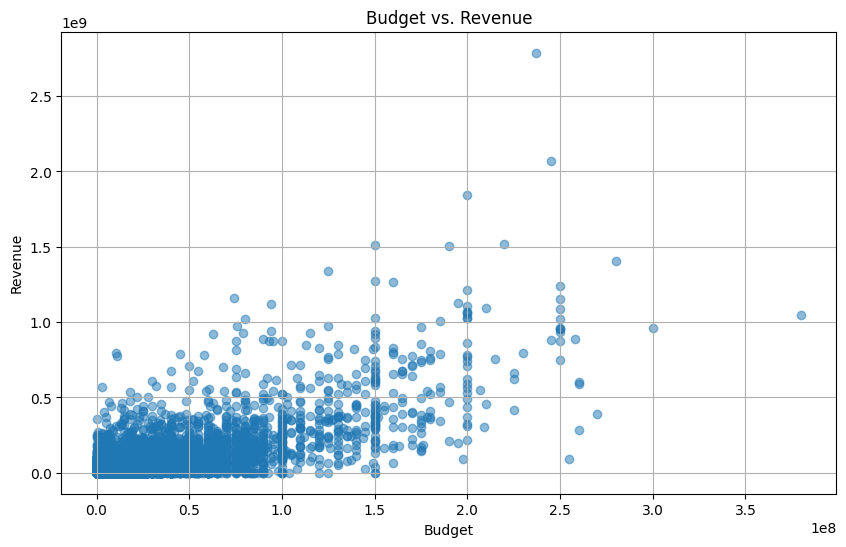

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_metadata_clean['budget'], movies_metadata_clean['revenue'], alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

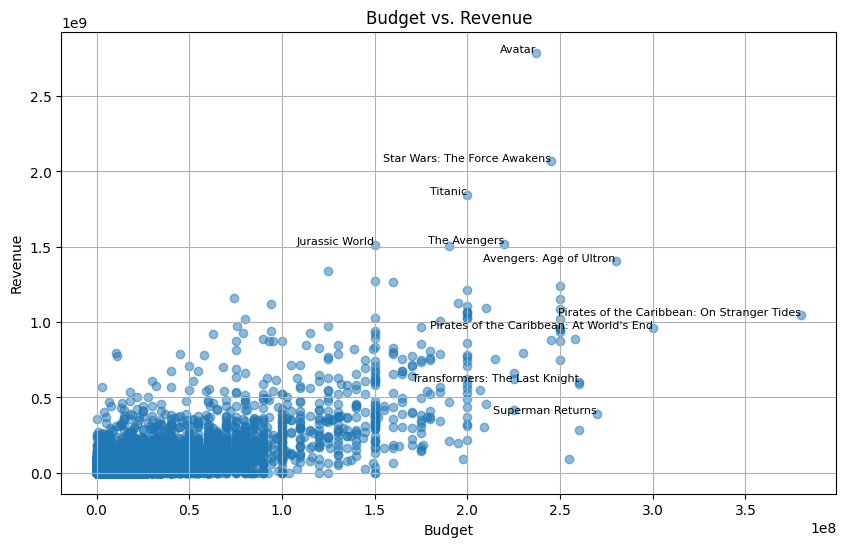

In [30]:
# budget vs revenue plot
plt.figure(figsize=(10, 6))
plt.scatter(movies_metadata_clean['budget'], movies_metadata_clean['revenue'], alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)

# adding labels to see top movies
top_n = 5  # no. of labels
budget_revenue = movies_metadata_clean[['budget', 'revenue', 'title']].dropna()
budget_revenue_sorted = budget_revenue.sort_values(by=['revenue', 'budget'], ascending=False)

# top n points by revenue
top_revenue_points = budget_revenue_sorted.head(top_n)
# top n points by budget
top_budget_points = budget_revenue_sorted.sort_values(by=['budget', 'revenue'], ascending=False).head(top_n)

# combine both
top_points = pd.concat([top_revenue_points, top_budget_points]).drop_duplicates()

for i, row in top_points.iterrows():
    plt.text(row['budget'], row['revenue'], row['title'], fontsize=8, ha='right')

plt.show()

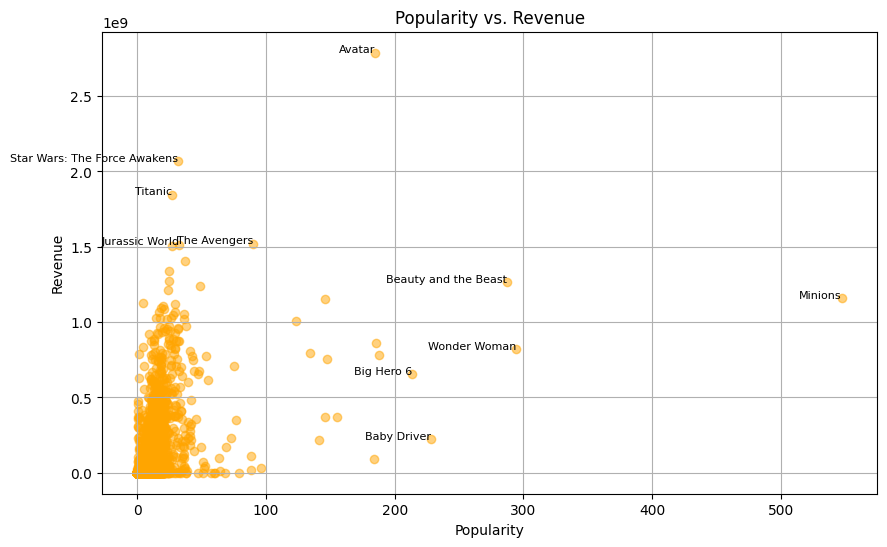

In [31]:
# popularity score vs revenue
plt.figure(figsize=(10, 6))
plt.scatter(movies_metadata_clean['popularity'], movies_metadata_clean['revenue'], alpha=0.5, color='orange')
plt.title('Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.grid(True)

# adding labels to see top movies
top_n = 5  # no. of labels
popularity_revenue = movies_metadata_clean[['popularity', 'revenue', 'title']].dropna()
popularity_revenue_sorted = popularity_revenue.sort_values(by=['revenue', 'popularity'], ascending=False)

# top n points by revenue
top_revenue_points = popularity_revenue_sorted.head(top_n)
# top n points by popularity
top_popularity_points = popularity_revenue_sorted.sort_values(by=['popularity', 'revenue'], ascending=False).head(top_n)

# combine both
top_points = pd.concat([top_revenue_points, top_popularity_points]).drop_duplicates()

for i, row in top_points.iterrows():
    plt.text(row['popularity'], row['revenue'], row['title'], fontsize=8, ha='right')

plt.show()

### okay, what does popularity mean here exactly, comparing it to vote count

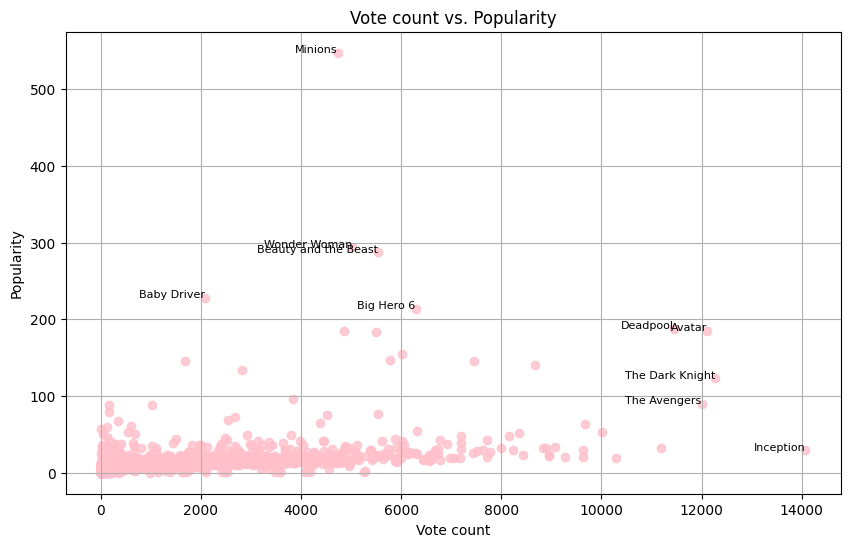

In [32]:
# popularity vote count vs popularity
plt.figure(figsize=(10, 6))
plt.scatter(movies_metadata_clean['vote_count'], movies_metadata_clean['popularity'], alpha=0.8, color='pink')
plt.title('Vote count vs. Popularity')
plt.xlabel('Vote count')
plt.ylabel('Popularity')
plt.grid(True)

# adding labels to see top movies
top_n = 5  # no. of labels
vote_count_popularity = movies_metadata_clean[['vote_count', 'popularity', 'title']].dropna()
vote_count_popularity_sorted = vote_count_popularity.sort_values(by=['popularity', 'vote_count'], ascending=False)

# top n points by vote count
top_popularity_points = vote_count_popularity_sorted.head(top_n)
# top n points by popularity
top_vote_count_points = vote_count_popularity_sorted.sort_values(by=['vote_count', 'popularity'], ascending=False).head(top_n)

# combine both
top_points = pd.concat([top_popularity_points, top_vote_count_points]).drop_duplicates()

for i, row in top_points.iterrows():
    plt.text(row['vote_count'], row['popularity'], row['title'], fontsize=8, ha='right')

plt.show()

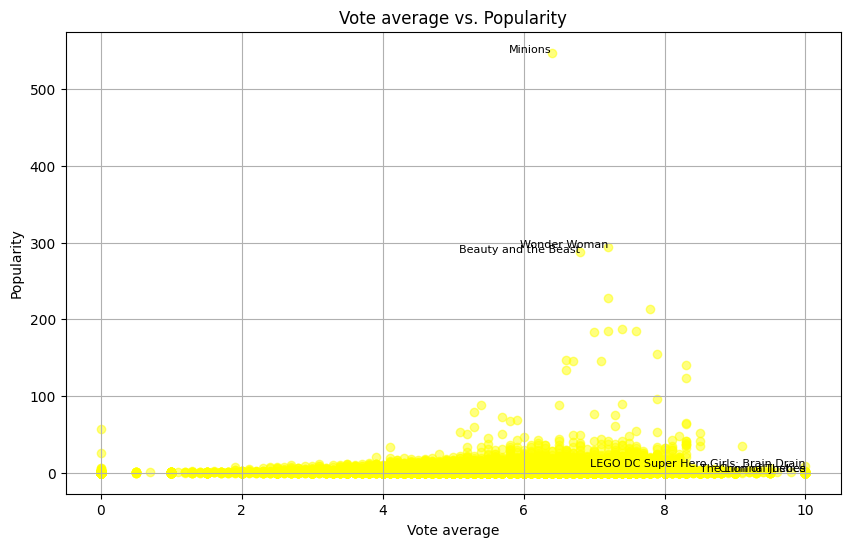

In [33]:
# popularity vote score vs popularity
plt.figure(figsize=(10, 6))
plt.scatter(movies_metadata_clean['vote_average'], movies_metadata_clean['popularity'], alpha=0.5, color='yellow')
plt.title('Vote average vs. Popularity')
plt.xlabel('Vote average')
plt.ylabel('Popularity')
plt.grid(True)

# adding labels to see top movies
top_n = 3  # no. of labels
vote_average_popularity = movies_metadata_clean[['vote_average', 'popularity', 'title']].dropna()
vote_average_popularity_sorted = vote_average_popularity.sort_values(by=['popularity', 'vote_average'], ascending=False)

# top n points by vote average
top_popularity_points = vote_average_popularity_sorted.head(top_n)
# top n points by popularity
top_vote_average_points = vote_average_popularity_sorted.sort_values(by=['vote_average', 'popularity'], ascending=False).head(top_n)

# combine both
top_points = pd.concat([top_popularity_points, top_vote_average_points]).drop_duplicates()

for i, row in top_points.iterrows():
    plt.text(row['vote_average'], row['popularity'], row['title'], fontsize=8, ha='right')

plt.show()

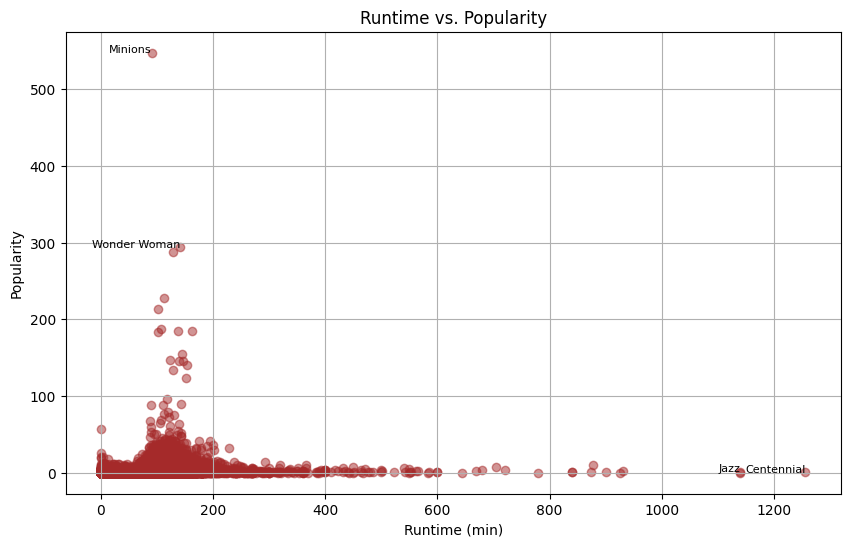

In [34]:
# popularity vote count vs popularity
plt.figure(figsize=(10, 6))
plt.scatter(movies_metadata_clean['runtime'], movies_metadata_clean['popularity'], alpha=0.5, color='brown')
plt.title('Runtime vs. Popularity')
plt.xlabel('Runtime (min)')
plt.ylabel('Popularity')
plt.grid(True)

# adding labels to see top movies
top_n = 2  # no. of labels
runtime_popularity = movies_metadata_clean[['runtime', 'popularity', 'title']].dropna()
runtime_popularity_sorted = runtime_popularity.sort_values(by=['popularity', 'runtime'], ascending=False)

# top n points by Runtime
top_popularity_points = runtime_popularity_sorted.head(top_n)
# top n points by popularity
top_runtime_points = runtime_popularity_sorted.sort_values(by=['runtime', 'popularity'], ascending=False).head(top_n)

# combine both
top_points = pd.concat([top_popularity_points, top_runtime_points]).drop_duplicates()

for i, row in top_points.iterrows():
    plt.text(row['runtime'], row['popularity'], row['title'], fontsize=8, ha='right')

plt.show()

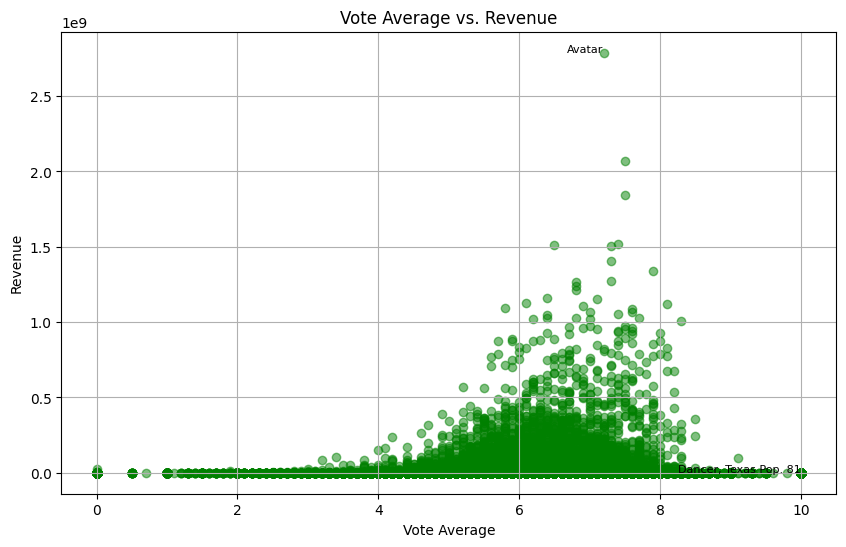

In [35]:
# vote score vs revenue
plt.figure(figsize=(10, 6))
plt.scatter(movies_metadata_clean['vote_average'], movies_metadata_clean['revenue'], alpha=0.5, color='green')
plt.title('Vote Average vs. Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.grid(True)

# adding labels to see top movies
top_n = 1  # no. of labels, top rated movie titles overlap if you add more
vote_revenue = movies_metadata_clean[['vote_average', 'revenue', 'title']].dropna()
vote_revenue_sorted = vote_revenue.sort_values(by=['revenue', 'vote_average'], ascending=False)

# top n points by revenue
top_revenue_points = vote_revenue_sorted.head(top_n)
# top n points by votes
top_vote_points = vote_revenue_sorted.sort_values(by=['vote_average', 'revenue'], ascending=False).head(top_n)

# combine both
top_points = pd.concat([top_revenue_points, top_vote_points]).drop_duplicates()

for i, row in top_points.iterrows():
    plt.text(row['vote_average'], row['revenue'], row['title'], fontsize=8, ha='right')

plt.show()

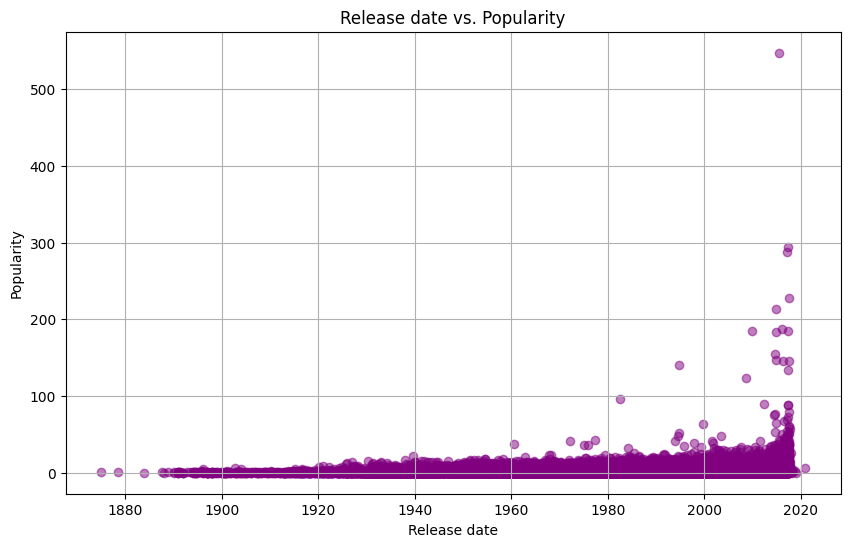

In [36]:
# release date vs popularity
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(movies_metadata_clean['release_date']), movies_metadata_clean['popularity'], alpha=0.5, color='purple')
plt.title('Release date vs. Popularity')
plt.xlabel('Release date')
plt.ylabel('Popularity')
plt.grid(True)

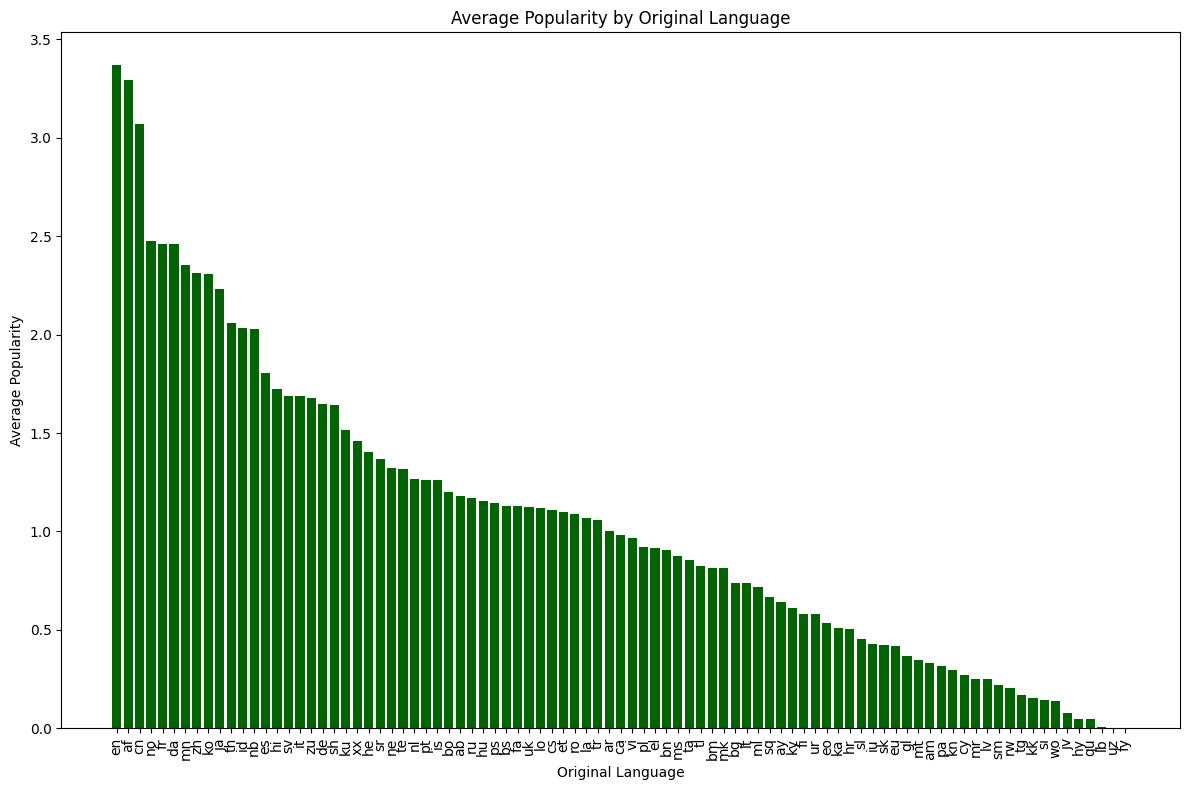

In [37]:
original_language = movies_metadata_clean['original_language']
popularity = movies_metadata_clean['popularity']

data = pd.DataFrame({'Original Language': original_language, 'Popularity': popularity})

# group by mean popularity
popularity_by_language = data.groupby('Original Language')['Popularity'].mean().sort_values(ascending=False)

# plot
plt.figure(figsize=(12, 8))
plt.bar(popularity_by_language.index, popularity_by_language.values, color='darkgreen')
plt.title('Average Popularity by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

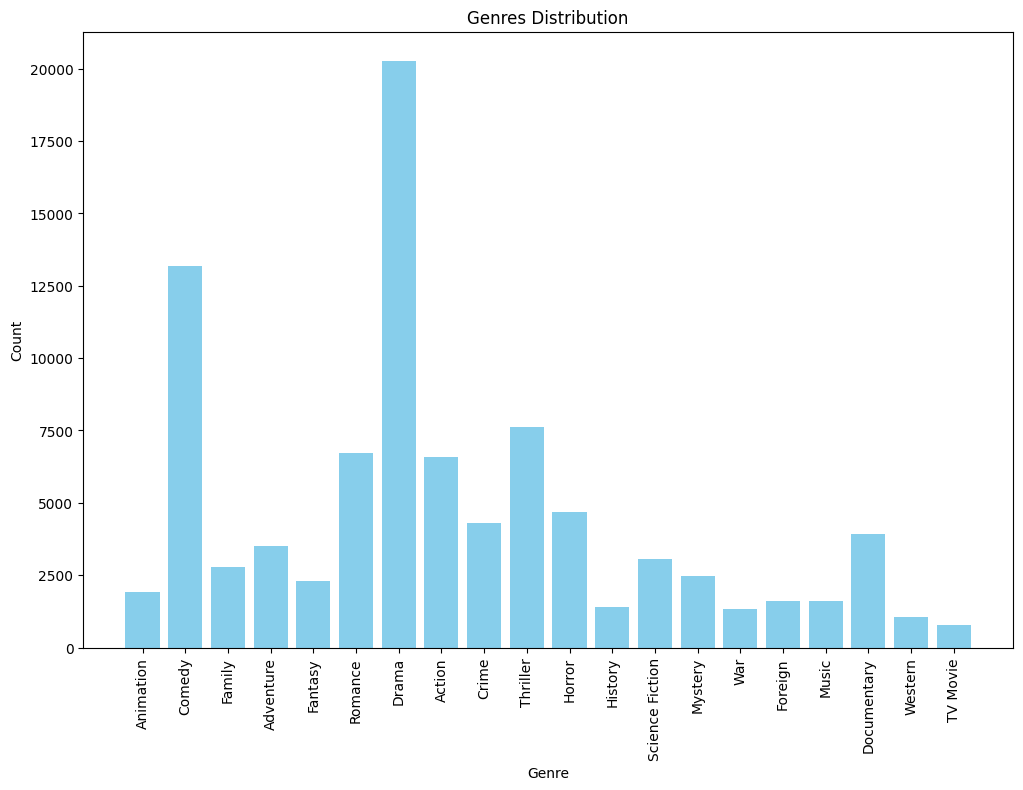

In [38]:
import ast
from collections import Counter

# apply a lambda function to genres. Lambda func says:
    # if x is not null, convert the string value to a list of dictionaries with ast.literal_eval(x)
    # then get 'name' value from every dictionary and put them into a new list
    # and if x is null - return an empty list
genres = movies_metadata_clean['genres'].apply(lambda x: [genre['name'] for genre in ast.literal_eval(x)] if pd.notnull(x) else [])
all_genres = [genre for sublist in genres for genre in sublist]
genres_count = Counter(all_genres)

plt.figure(figsize=(12, 8))
plt.bar(genres_count.keys(), genres_count.values(), color='skyblue')
plt.title('Genres Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

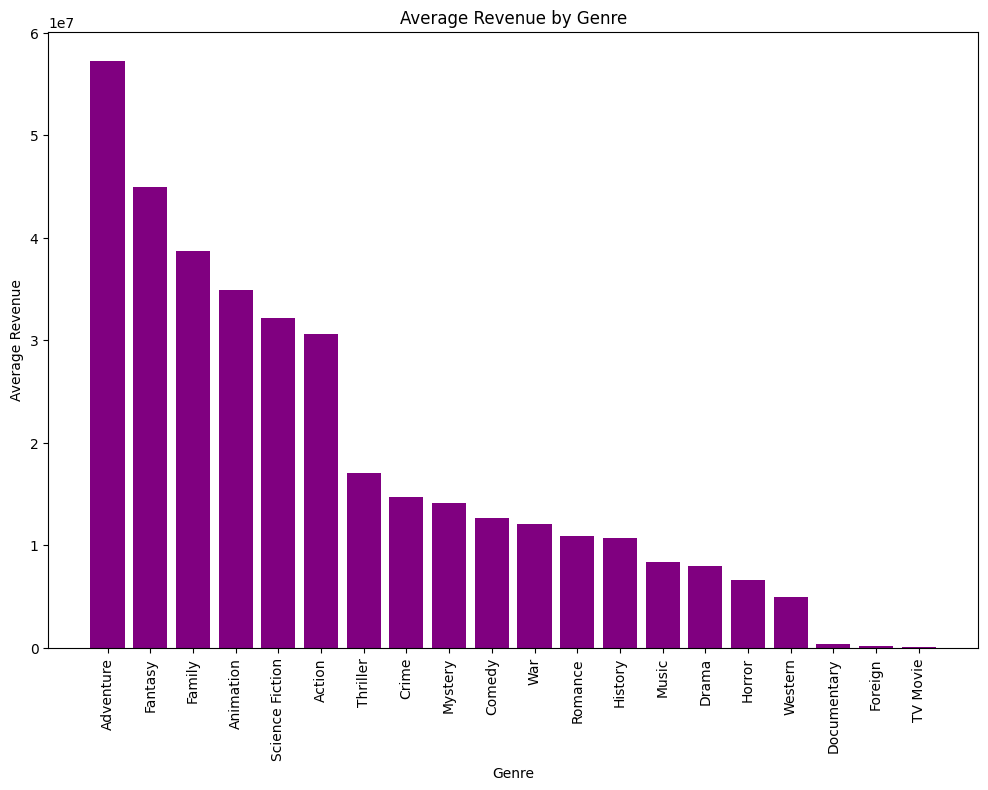

In [39]:
# new df to store genres and their revenue values
genre_revenue = []

for i, row in movies_metadata_clean.iterrows():
    if pd.notnull(row['genres']):
        genres_list = ast.literal_eval(row['genres'])
        for genre in genres_list:
            genre_revenue.append({'genre': genre['name'], 'revenue': row['revenue']})

genre_revenue_df = pd.DataFrame(genre_revenue)
genre_revenue_grouped = genre_revenue_df.groupby('genre').mean().sort_values(by='revenue', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(genre_revenue_grouped.index, genre_revenue_grouped['revenue'], color='purple')
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.xticks(rotation=90)
plt.show()

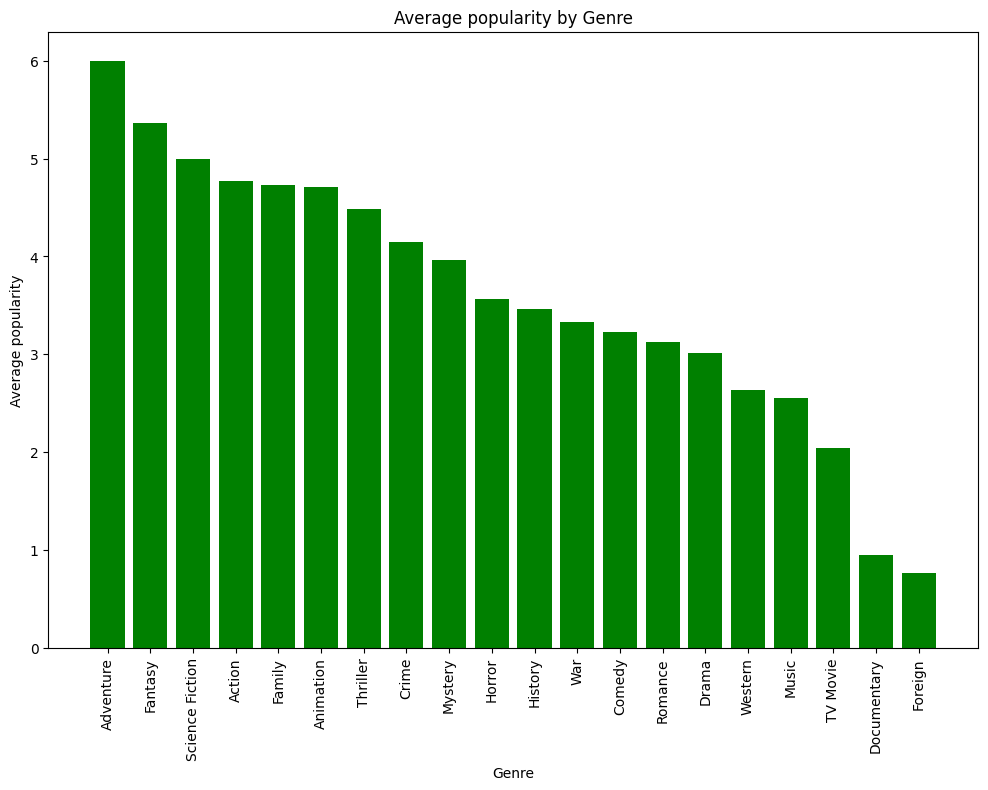

In [40]:
# new df to store genres and their popularity values
genre_popularity = []

for i, row in movies_metadata_clean.iterrows():
    if pd.notnull(row['genres']):
        genres_list = ast.literal_eval(row['genres'])
        for genre in genres_list:
            genre_popularity.append({'genre': genre['name'], 'popularity': row['popularity']})

genre_popularity_df = pd.DataFrame(genre_popularity)
genre_popularity_grouped = genre_popularity_df.groupby('genre').mean().sort_values(by='popularity', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(genre_popularity_grouped.index, genre_popularity_grouped['popularity'], color='green')
plt.title('Average popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average popularity')
plt.xticks(rotation=90)
plt.show()

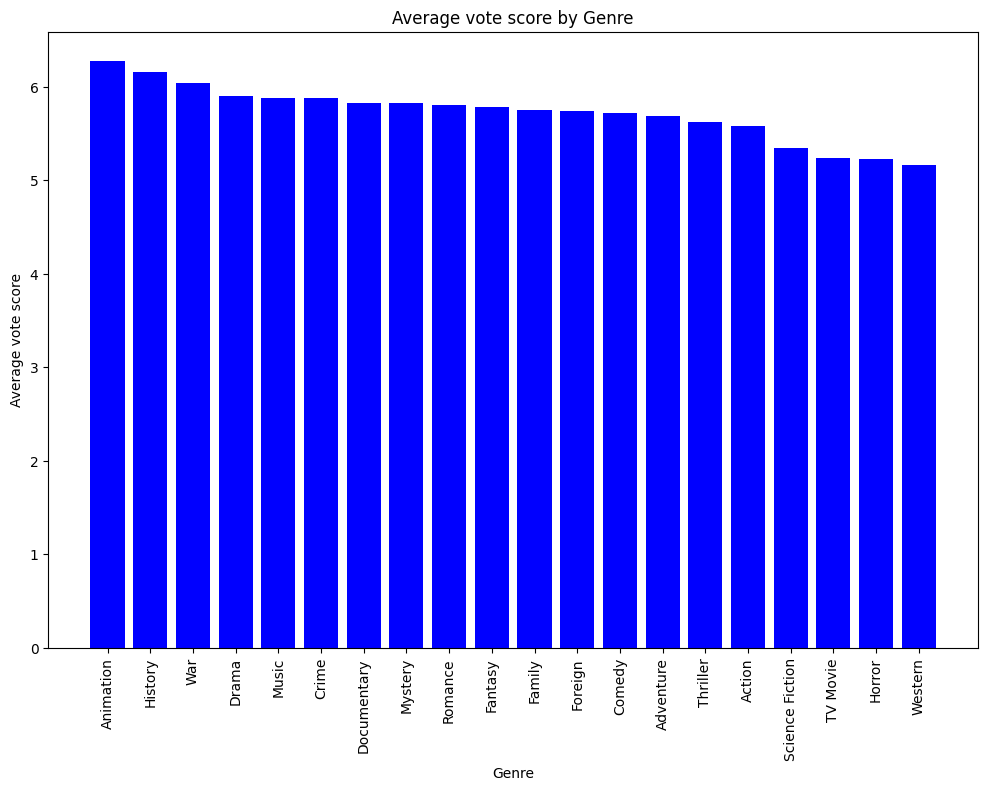

In [41]:
# new df to store genres and their vote_average values
genre_vote_average = []

for i, row in movies_metadata_clean.iterrows():
    if pd.notnull(row['genres']):
        genres_list = ast.literal_eval(row['genres'])
        for genre in genres_list:
            genre_vote_average.append({'genre': genre['name'], 'vote_average': row['vote_average']})

genre_vote_average_df = pd.DataFrame(genre_vote_average)
genre_vote_average_grouped = genre_vote_average_df.groupby('genre').mean().sort_values(by='vote_average', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(genre_vote_average_grouped.index, genre_vote_average_grouped['vote_average'], color='blue')
plt.title('Average vote score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average vote score')
plt.xticks(rotation=90)
plt.show()

# Taking a look at the other files

## Idea is to combine the movies metadata and keywords into one df and look at some tendencies

In [42]:
# make data type same
keywords['id'] = keywords['id'].astype(str)

In [43]:
movies_with_keywords = pd.merge(movies_metadata_clean, keywords, left_on='id', right_on='id', how='left')

In [44]:
keyword_popularity = []

for i, row in movies_with_keywords.iterrows():
    if pd.notnull(row['keywords']):
        keywords_list = ast.literal_eval(row['keywords'])
        for keyword in keywords_list:
            keyword_popularity.append({'keyword': keyword['name'], 'popularity': row['popularity']})

keyword_popularity_df = pd.DataFrame(keyword_popularity)
keyword_popularity_grouped = keyword_popularity_df.groupby('keyword').mean().sort_values(by='popularity', ascending=False)
keyword_popularity_grouped_lowest = keyword_popularity_df.groupby('keyword').mean().sort_values(by='popularity', ascending=True)

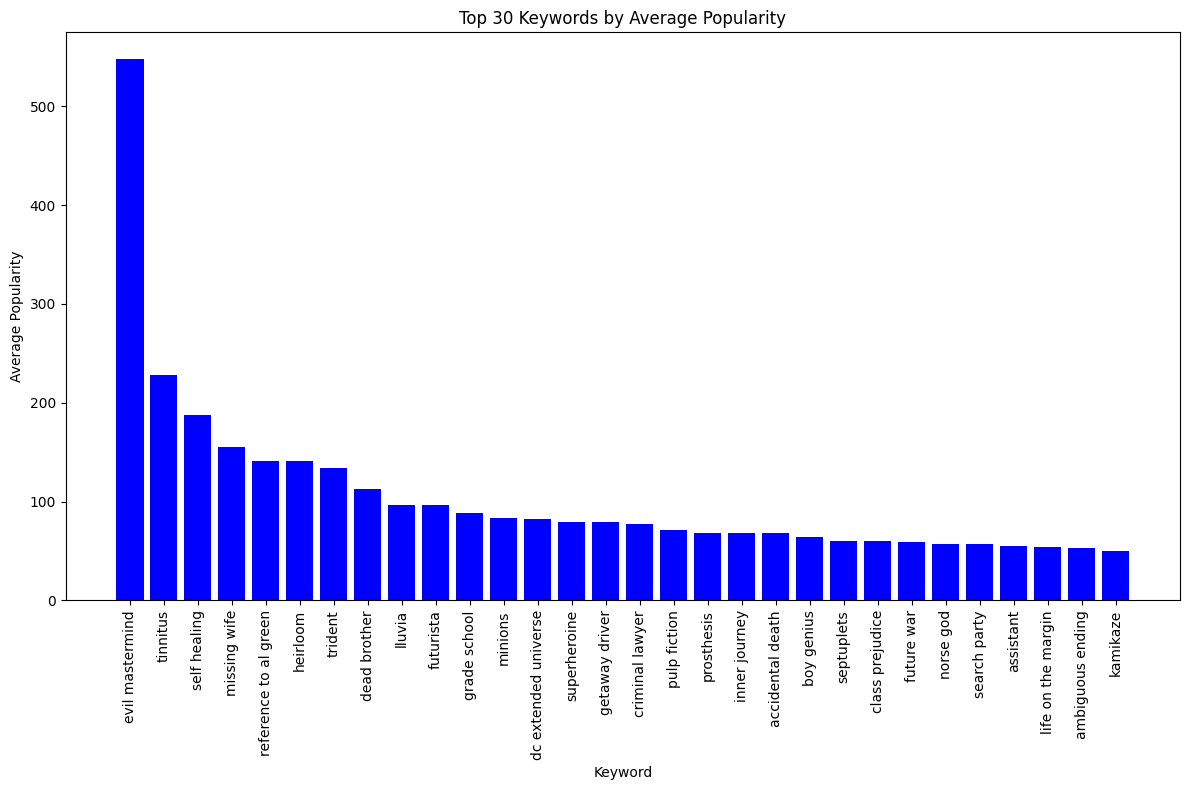

In [45]:
plt.figure(figsize=(12, 8))
plt.bar(keyword_popularity_grouped.index[:30], keyword_popularity_grouped['popularity'][:30], color='blue')
plt.title('Top 30 Keywords by Average Popularity')
plt.xlabel('Keyword')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

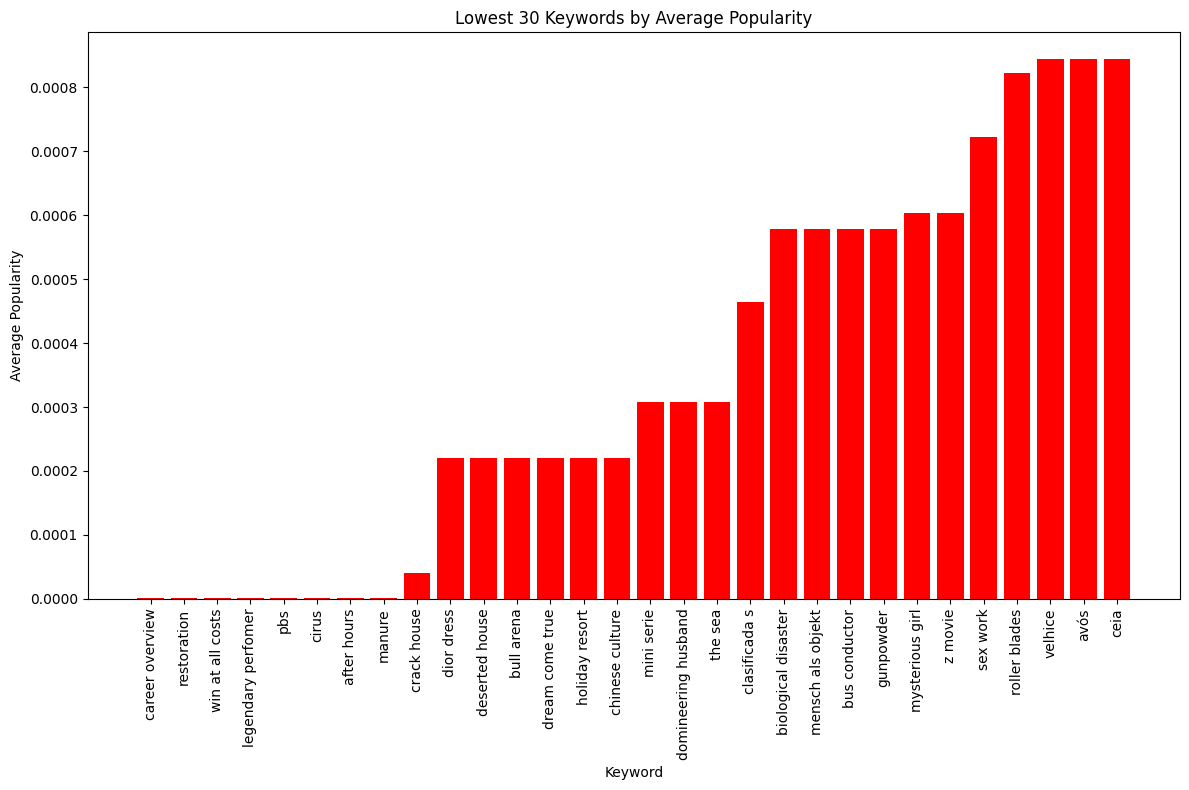

In [46]:
plt.figure(figsize=(12, 8))
plt.bar(keyword_popularity_grouped_lowest.index[:30], keyword_popularity_grouped_lowest['popularity'][:30], color='red')
plt.title('Lowest 30 Keywords by Average Popularity')
plt.xlabel('Keyword')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Number of nodes: 501
Number of edges: 3316


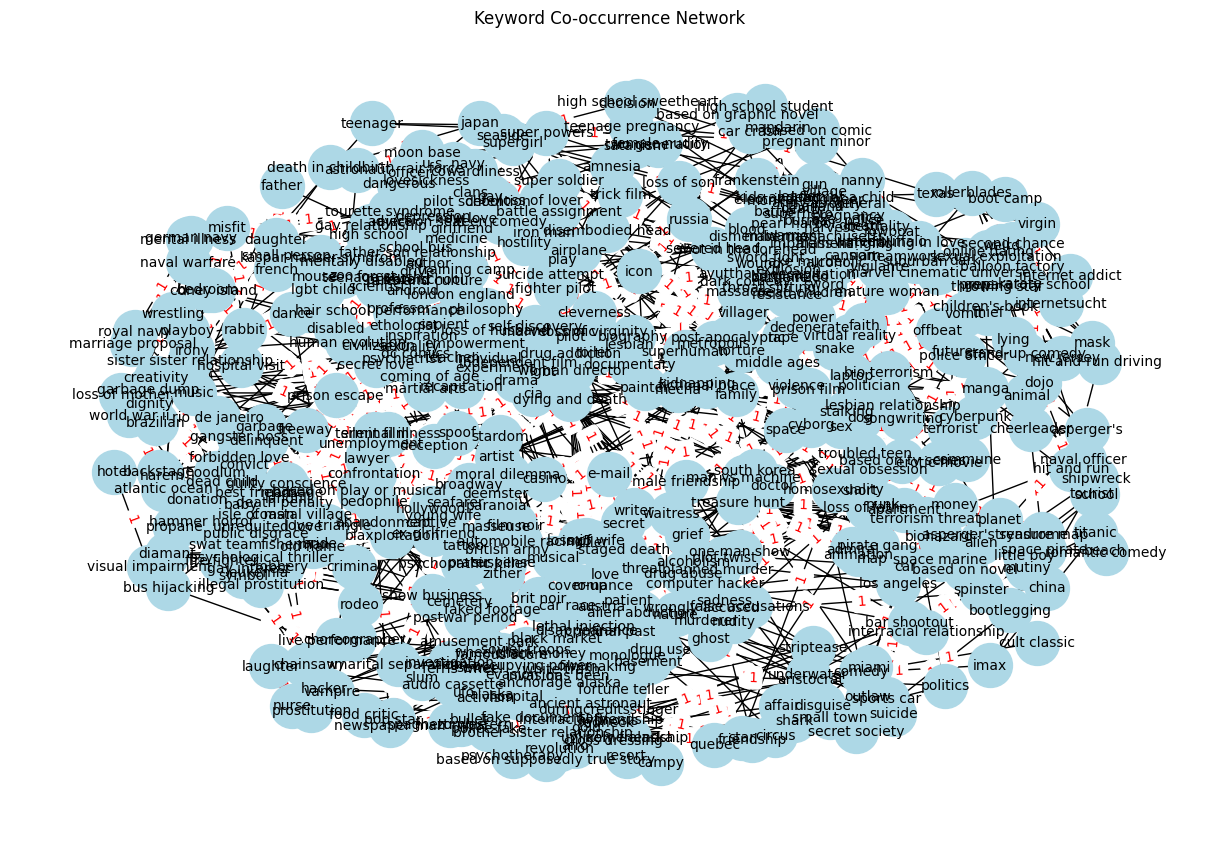

In [47]:
import itertools
import networkx as nx 


G = nx.Graph()

# take a sample of 200 rows to check if this is even logical
sample_df = movies_with_keywords.sample(n=200)

for index, row in sample_df.iterrows():
    if pd.notnull(row['keywords']):
        # change the keywords string to a list of dictionaries
        keywords_list = ast.literal_eval(row['keywords'])
        
        # take the keyword names
        keyword_names = [keyword['name'] for keyword in keywords_list]
        
        # create all pairs
        keyword_pairs = list(itertools.combinations(keyword_names, 2))
        
        # create edges for each pair
        for pair in keyword_pairs:
            if G.has_edge(*pair):
                # weight of the edge if it already exists
                G[pair[0]][pair[1]]['weight'] += 1
            else:
                # new edge with weight 1 if it doesn't exist
                G.add_edge(pair[0], pair[1], weight=1)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # use Fruchterman-Reingold force-directed algorithm for positioning
nx.draw(G, pos, node_color='lightblue', node_size=1000, with_labels=True, font_size=10, font_color='black')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Keyword Co-occurrence Network')
plt.show()

### sadly doens't really look nice or readable


In [48]:
# movies_with_keywords.to_csv('movies_with_keywords.csv', index=False)

## Ratings data with moveies meta data

In [49]:
# normalize the ratings to a 1-10 scale, since the movies_metadata is on a out of 10 ratings scale
ratings['rating'] = ratings['rating'] * 2

In [50]:
movie_ratings = ratings.groupby('movieId').agg({
    'rating': ['mean', 'count']
}).reset_index()
movie_ratings.columns = ['movieId', 'avg_rating', 'num_ratings']

print(movie_ratings.head())

   movieId  avg_rating  num_ratings
0        1    7.744939          247
1        2    6.803738          107
2        3    6.322034           59
3        4    4.769231           13
4        5    6.535714           56


In [51]:
# make sure same data type
movies_metadata_clean['id'] = movies_metadata_clean['id'].astype(int)

movies_with_ratings = pd.merge(movies_metadata_clean, movie_ratings, left_on='id', right_on='movieId', how='left')

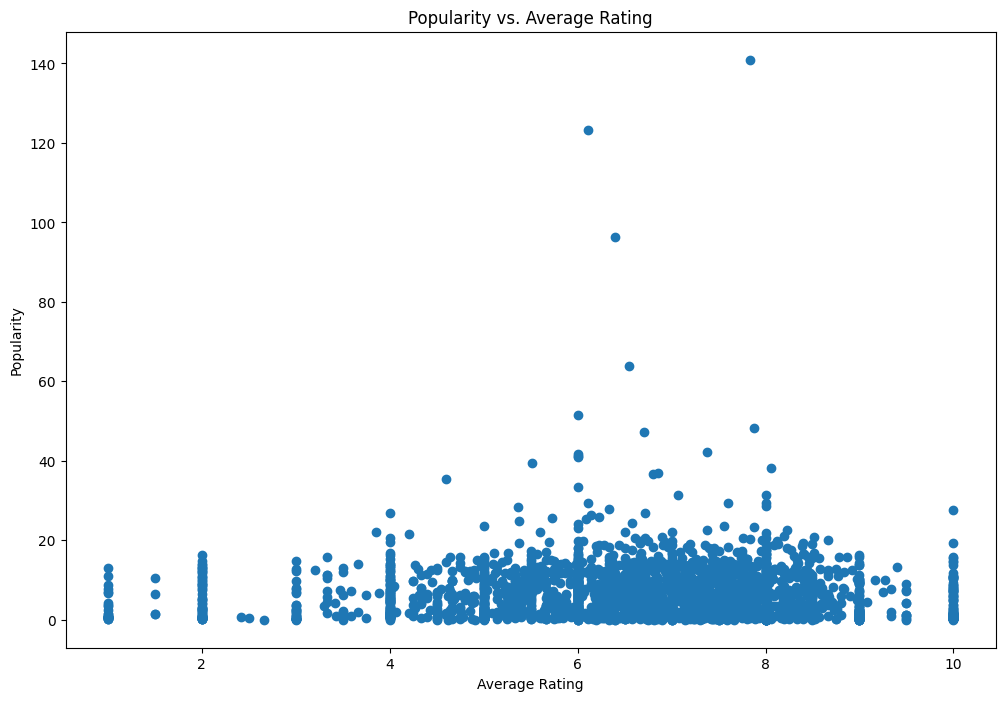

In [52]:
plt.figure(figsize=(12, 8))
plt.scatter(movies_with_ratings['avg_rating'], movies_with_ratings['popularity'])
plt.title('Popularity vs. Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Popularity')
plt.show()

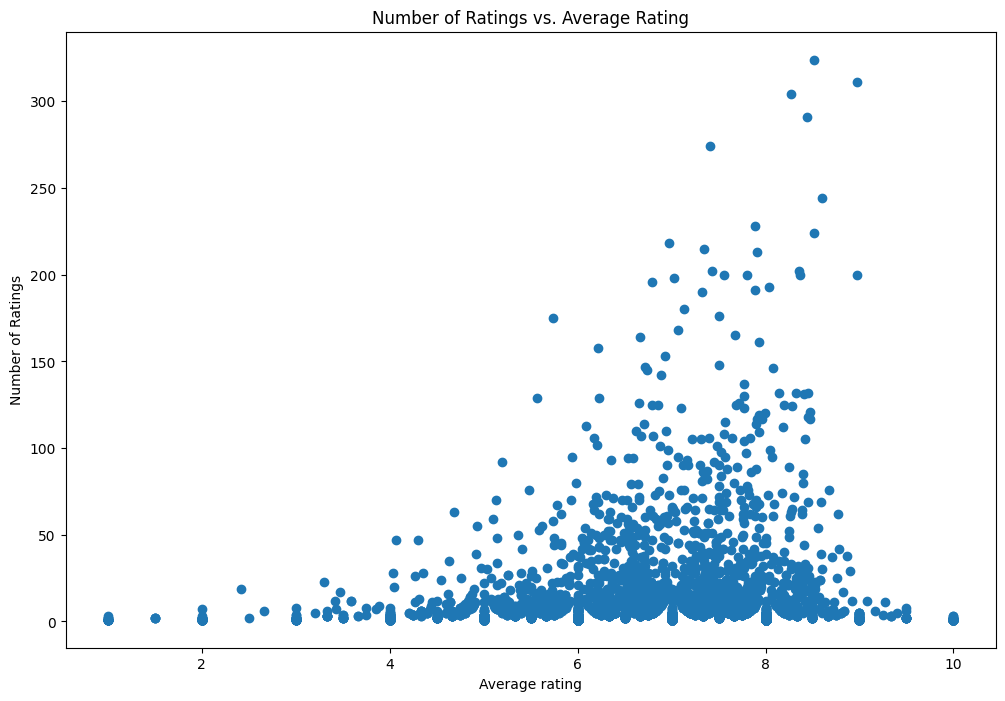

In [53]:
plt.figure(figsize=(12, 8))
plt.scatter(movies_with_ratings['avg_rating'], movies_with_ratings['num_ratings'])
plt.title('Number of Ratings vs. Average Rating')
plt.xlabel('Average rating')
plt.ylabel('Number of Ratings')
plt.show()

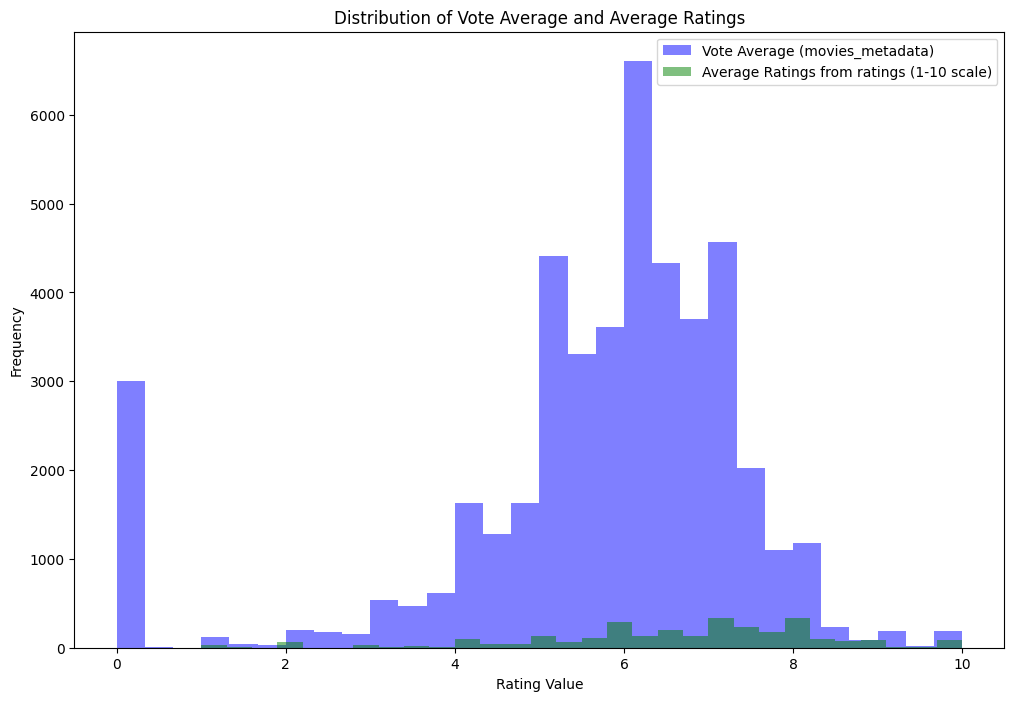

In [54]:
vote_average = movies_with_ratings['vote_average'].dropna()
avg_ratings = movies_with_ratings['avg_rating'].dropna()

# compare both ratings
plt.figure(figsize=(12, 8))
plt.hist(vote_average, bins=30, alpha=0.5, label='Vote Average (movies_metadata)', color='blue')
plt.hist(avg_ratings, bins=30, alpha=0.5, label='Average Ratings from ratings (1-10 scale)', color='green')
plt.title('Distribution of Vote Average and Average Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

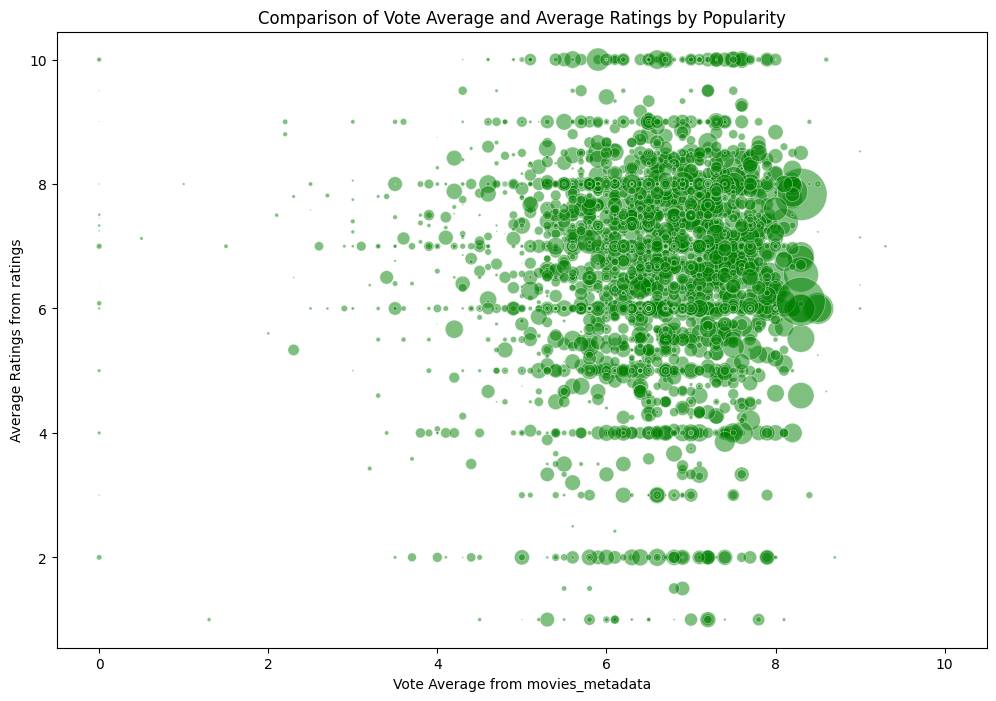

In [55]:
data = movies_with_ratings[['vote_average', 'avg_rating', 'popularity']].dropna()

plt.figure(figsize=(12, 8))
plt.scatter(data['vote_average'], data['avg_rating'], s=data['popularity']*10, alpha=0.5, c='green', edgecolors='w', linewidth=0.5)
plt.title('Comparison of Vote Average and Average Ratings by Popularity')
plt.xlabel('Vote Average from movies_metadata')
plt.ylabel('Average Ratings from ratings')
plt.show()

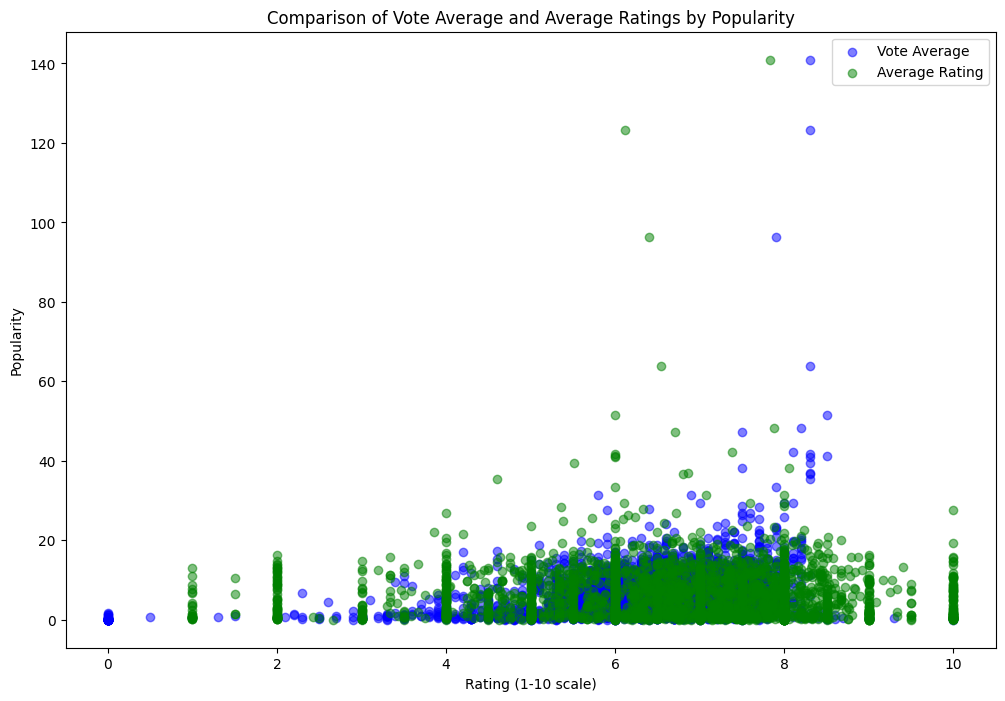

In [56]:
data = movies_with_ratings[['vote_average', 'avg_rating', 'popularity']].dropna()

plt.figure(figsize=(12, 8))

plt.scatter(data['vote_average'], data['popularity'], alpha=0.5, c='blue', label='Vote Average')

plt.scatter(data['avg_rating'], data['popularity'], alpha=0.5, c='green', label='Average Rating')

plt.title('Comparison of Vote Average and Average Ratings by Popularity')
plt.xlabel('Rating (1-10 scale)')
plt.ylabel('Popularity')
plt.legend()
plt.show()

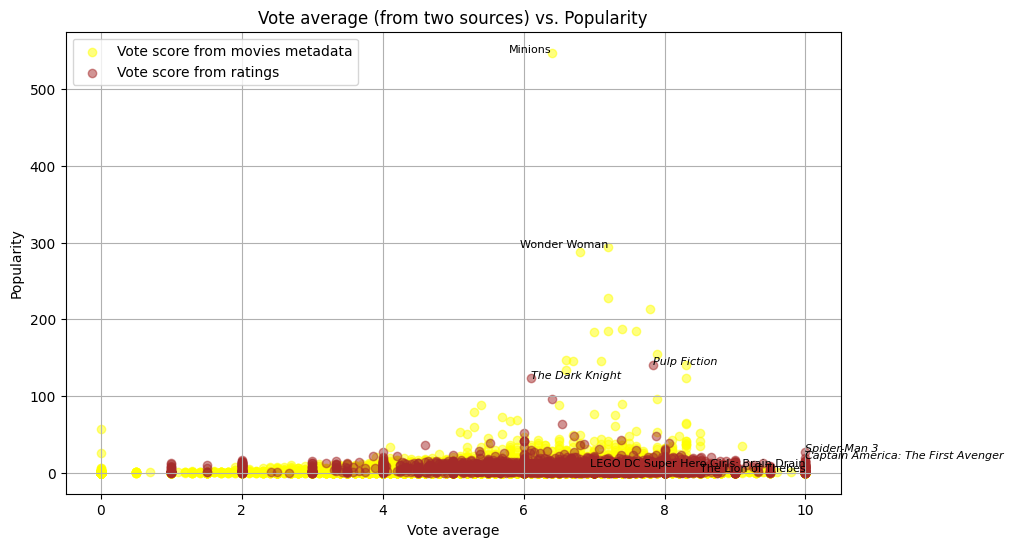

In [57]:
# popularity vote score vs popularity
plt.figure(figsize=(10, 6))
plt.scatter(movies_with_ratings['vote_average'], movies_with_ratings['popularity'], alpha=0.5, color='yellow', label = 'Vote score from movies metadata')
plt.scatter(movies_with_ratings['avg_rating'], movies_with_ratings['popularity'], alpha=0.5, color='brown', label = 'Vote score from ratings')
plt.title('Vote average (from two sources) vs. Popularity')
plt.xlabel('Vote average')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)

# adding labels to see top movies
top_n = 2  # no. of labels
vote_average_popularity = movies_metadata_clean[['vote_average', 'popularity', 'title']].dropna()
vote_average_popularity_sorted = vote_average_popularity.sort_values(by=['popularity', 'vote_average'], ascending=False)

vote_average_popularity_RATINGS = movies_with_ratings[['avg_rating', 'popularity', 'title']].dropna()
vote_average_popularity_sorted_RATINGS = vote_average_popularity_RATINGS.sort_values(by=['popularity', 'avg_rating'], ascending=False)

# top n points by vote average
top_popularity_points = vote_average_popularity_sorted.head(top_n)
top_popularity_points_RATINGS = vote_average_popularity_sorted_RATINGS.head(top_n)

# top n points by popularity
top_vote_average_points = vote_average_popularity_sorted.sort_values(by=['vote_average', 'popularity'], ascending=False).head(top_n)
top_vote_average_points_RATINGS = vote_average_popularity_sorted_RATINGS.sort_values(by=['avg_rating', 'popularity'], ascending=False).head(top_n)

# combine both
top_points = pd.concat([top_popularity_points, top_vote_average_points]).drop_duplicates()
top_points_RATINGS = pd.concat([top_popularity_points_RATINGS, top_vote_average_points_RATINGS]).drop_duplicates()

for i, row in top_points.iterrows():
    plt.text(row['vote_average'], row['popularity'], row['title'], fontsize=8, ha='right')

for i, row in top_points_RATINGS.iterrows():
    plt.text(row['avg_rating'], row['popularity'], row['title'], fontsize=8, ha='left', style = 'italic')

plt.show()

In [58]:
# # new df to store companies and their popularity values
# company_popularity = []

# for i, row in movies_metadata_clean.iterrows():
#     if pd.notnull(row['production_companies']):
#         company_list = ast.literal_eval(row['production_companies'])
#         for company in company_list:
#             company_popularity.append({'production_companies': company['name'], 'popularity': row['popularity']})

# company_popularity_df = pd.DataFrame(company_popularity)
# company_popularity_grouped = company_popularity_df.groupby('production_companies').mean().sort_values(by='popularity', ascending=False)

# plt.figure(figsize=(12, 8))
# plt.bar(company_popularity_grouped.index, company_popularity_grouped['popularity'], color='green')
# plt.title('Average popularity by Production company')
# plt.xlabel('Production company')
# plt.ylabel('Average popularity')
# plt.xticks(rotation=90)
# plt.show()